# 6. Random forests

Previously, we learnt about decision trees. Decision trees are tree-shaped classifiers where the internal nodes represent the features of a dataset, the branch represents the decision rules and each leaf node represents the outcome. Decision trees are easy to interpret and understand.

However, decision trees have their drawbacks. Sometimes, in the construction of the decision tree, there are many nearly as good branching criteria, and the best one may be chosen with a very narrow margin. This makes the construction somewhat subject to random effects in the data. This is where random forests come in.

A random forest in a collection of decision trees. That is, instead of constructing just one tree, we construct a large number of trees (e.g. 100) simultaneously. Once thre collection of the trees is ready, we let the trees vote on the classification outcome for any given observation. Methods like this, where we construct an entire collection of models (decision trees in this case) are called ensemble methods.

The idea of the classification process with a random forest is illustrated in the following figure:

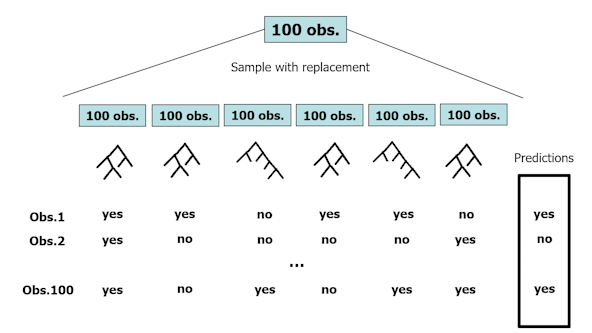

In [1]:
from IPython.display import Image,display;display(Image(filename="img/forest.png"))



As the construction of a decision tree is a deterministic process, all the trees would be similar unless we introduce some randomness. This is where the random part of the random forest comes in. We introduce randomness in two ways:
- We randomly select the data points used to build a tree. This is called bootstrap sampling.
- We randomly select the features used to build a tree.

The random forest algorithm is as follows:
```
Let the number of trees in the forest be n.
For i = 1 to n {
  Sample the training data with replacement (bootstrap sampling).
  Randomly select a subset of features.
  For the resulting dataset, build the decision tree i.
}
For each observation to be classified {
    For i = 1 to n {
        Let tree i classify the observation. The outcome serves as the vote of tree i.
    }
    Pick the class that gets the most votes as the classification outcome of the entire forest.
}
```

## Example: Iris dataset

Let's try to build our first random forest model using the Iris dataset:

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load the Iris data set
iris = load_iris()
X = iris.data
y = iris.target

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)

# Carry out 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Show results
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')


Fold-specific accuracies: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Overall accuracy (avg. of folds): 0.9600


In the `sklearn` library, a random forest is built using the `RandomForestClassifier` class. Let's look at its parameters in detail:

- **n_estimators**: Number of trees in the forest. This parameter sets the number of decision trees (estimators) in the random forest. In this case, the forest will consist of 100 decision trees. More trees generally lead to better performance and stability but also increase computational cost. The default value also happens to be 100.
- **bootstrap**: Whether to use bootstrap sampling to build each tree. This parameter indicates whether bootstrap sampling is used when building each decision tree. When bootstrap=True, each tree is trained on a random sample of the training data with replacement. This means that each sample in the training set may be included multiple times in the same tree. Bootstrap sampling helps in reducing overfitting and increasing the diversity of the trees in the forest. By default, bootstrap is set to True.
- **max_samples**: Proportion or number of samples to use for each tree (when bootstrap=True). This parameter controls the number of samples drawn from the training data to build each decision tree. When bootstrap=True, this parameter specifies that each tree will be trained on 70% of the training samples. This is a proportion of the total number of training samples. If max_samples is set to an integer, it would represent the exact number of samples. Reducing max_samples can speed up training and help in reducing overfitting. In bootstrap sampling, the sampling is done with replacement, so some samples may be repeated in the same tree.
- **max_features**: Proportion or number of features to consider when looking for the best split. This parameter determines the number of features to consider when looking for the best split in each decision tree. When set to a proportion, such as 0.75, it means that each split in each tree will consider 75% of the available features. If max_features is an integer, it would specify the exact number of features to consider. Limiting the number of features used in each split helps in reducing correlation between trees and improves the model's generalization ability. In the Iris example, the value of 0.75 ensures that each slipt contains three out of the four features. By default, max_features is set to the square root of the total number of features.
- **random_state**: Seed for random number generation to ensure reproducibility.

In addition, one can control the shape of the trees as is done with decision trees. For example, the `max_depth` parameter can be used to control the maximum depth of the trees. The default value is `None`, which means that the trees are grown until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

The `cross_val_score` function is used to carry out 10-fold cross-validation. The function returns the accuracy of the model for each fold. The average of these accuracies is the overall accuracy of the model. Whenever a new fold is considered, the function automatically fits the model to the training data and evaluates it on the test data.

As one might get curious about how the random forest model looks like, we can visualize the trees in the forest. Let's rerun the analysis and look at the first five trees in the forest. For simplicity, cross-validation is not performed in this example:


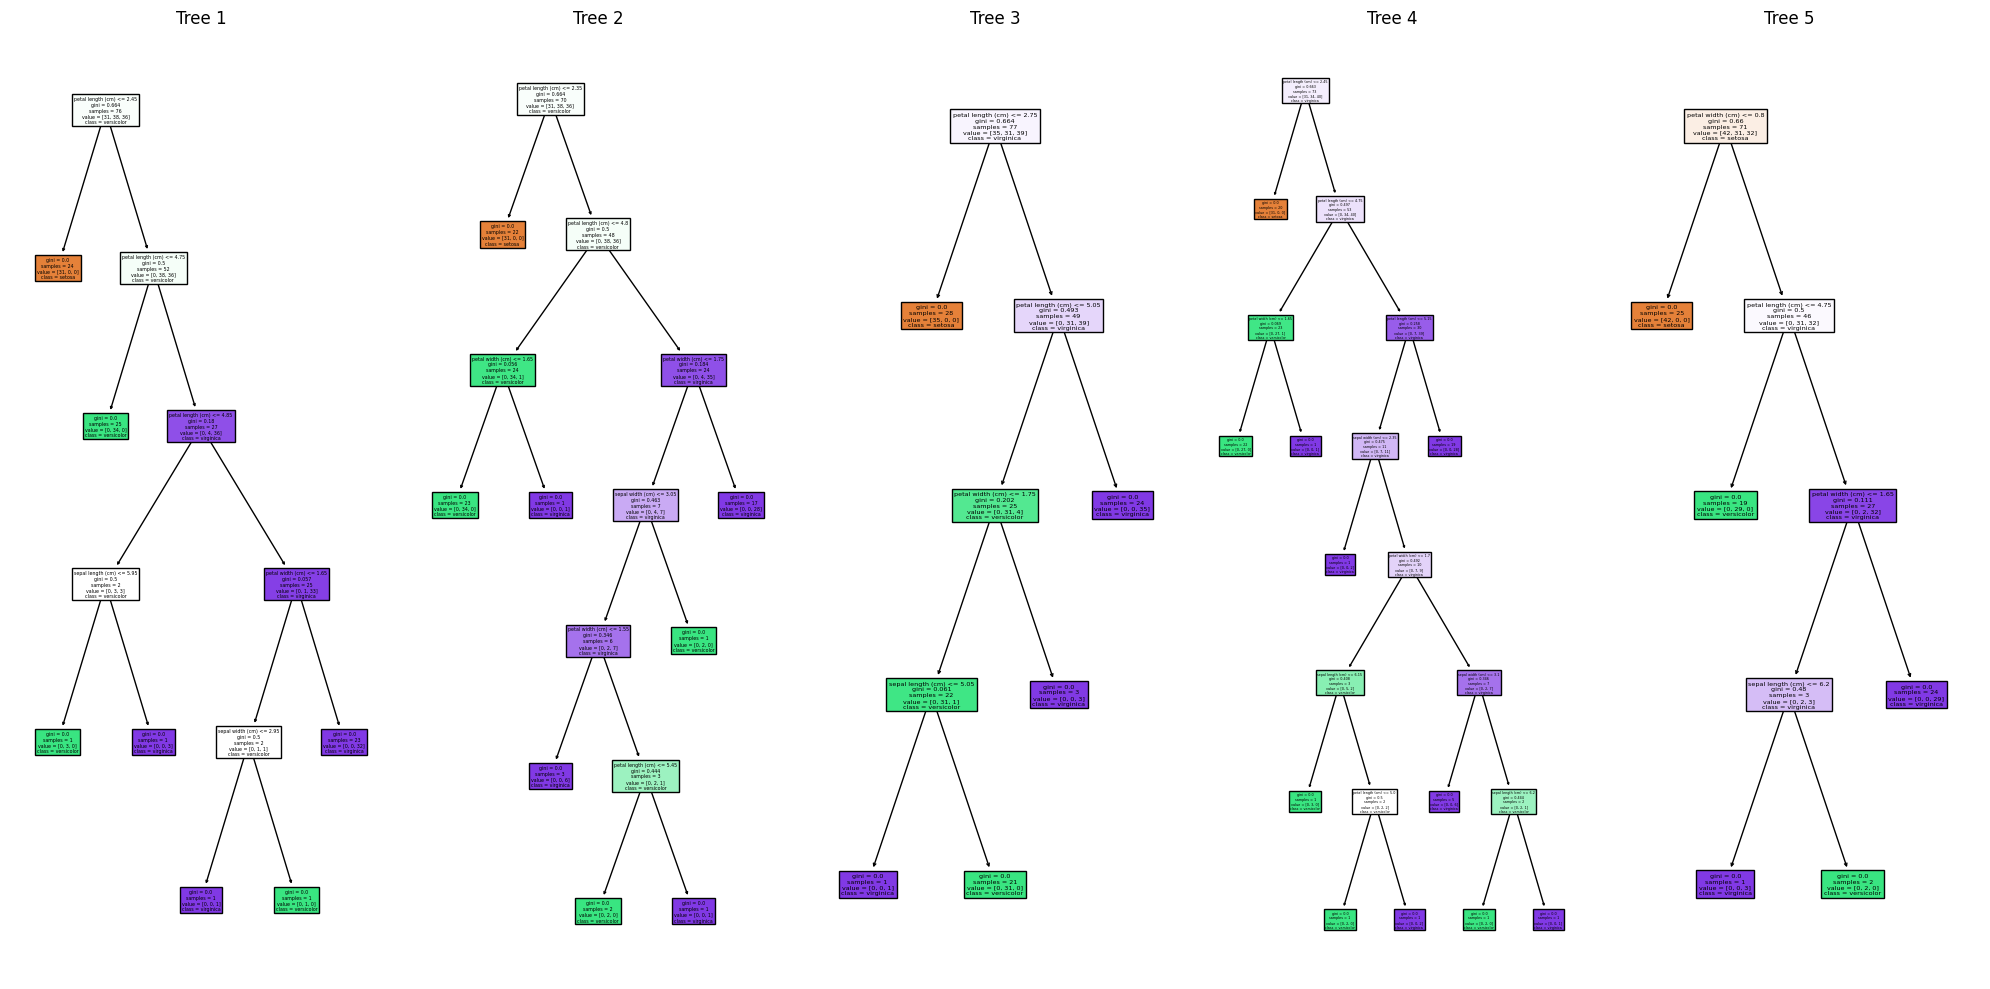

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)
model.fit(X, y)

# Number of trees to plot
n_trees_to_plot = 5

# Create a figure to hold the plots
plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(model.estimators_[i], filled=True,
              feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

## Feature importances

Random forests can also provide a measure of feature importance. Feature importance is a measure of how much each feature contributes to the model's predictions. It is calculated based on the decrease in impurity (e.g., Gini impurity) that each feature causes when used in a split. The more a feature decreases impurity, the more important it is considered to be.

The feature importance values are normalized so that they sum up to 1. The higher the value, the more important the feature is. Let's calculate the feature importance for the Iris dataset:

In [4]:
print (model.feature_importances_)

[0.01426822 0.01436214 0.51040072 0.46096892]


The result indicates that the third and fourth features are by far the most important for the random forest model's predictions, with the third feature contributing approximately 51% and the fourth feature contributing about 46%. This indicates that these features have a substantial impact on the model's decisions.
The first and second features have much lower importance scores (about 1.4% each). This suggests that these features play a minimal role in the classification decisions made by the model.

If one wanted to make the model more interpretable, one could consider using only the two most important features. This would simplify the model and make it easier to understand and explain. However, it might also reduce the model's performance, as it would be discarding potentially useful information contained in the less important features.

## Random forests and validation

In the previous example, we used 10-fold cross-validation to evaluate the random forest model. However, some sources quote that we could even skip validation when building random forests, as validation is in some sense of the word built into the random forest algorithm itself.

This is partially true. Random forests are less prone to overfitting compared to decision trees. This is because the random forest algorithm introduces randomness in two ways: by using bootstrap sampling and by randomly selecting a subset of features. This randomness helps in improving the model's generalization ability. However, it is still a good practice to validate the model using a separate validation set or cross-validation.

## Example 2: RMS Titanic

Let's make another example using the [RMS Titanic](https://en.wikipedia.org/wiki/Titanic) dataset. The dataset contains information about passengers on the Titanic, including whether they survived or not. The goal is to predict whether a passenger survived based on other information. The dataset, based on the passenger records of RMS Titanic, contains four columns:
- `pclass`: Passenger class (1st, 2nd, or 3rd)
- `sex`: Passenger's sex, male or female
- `age`: Passenger age (integer, in years. For babies under 1, age is fractional)
- `survived`: Whether the passenger survived (0 = No, 1 = Yes)

There are a few additional columns in the original dataset, but we will use only these four columns in this example, as they are the most relevant ones.

In [5]:
# read data (replace with your own path)
df = pd.read_csv('datasets/titanic/titanic_v2.csv', sep=';')
# drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)
display(df)

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1301,3,male,45.5000,0
1304,3,female,14.5000,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


In [6]:
colnames = df.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [7]:
# type conversions
# Note that DecisionTreeClassifier can't use strings in explanatory variables
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df.describe()

,pclass,sex,age,survived
count,1046.000000,1046.000000,1046.000000,1046.000000
mean,2.207457,1.370937,29.881135,0.408222
std,0.841497,0.483287,14.413500,0.491740
min,1.000000,1.000000,0.166700,0.000000
25%,1.000000,1.000000,21.000000,0.000000
50%,2.000000,1.000000,28.000000,0.000000
75%,3.000000,2.000000,39.000000,1.000000
max,3.000000,2.000000,80.000000,1.000000


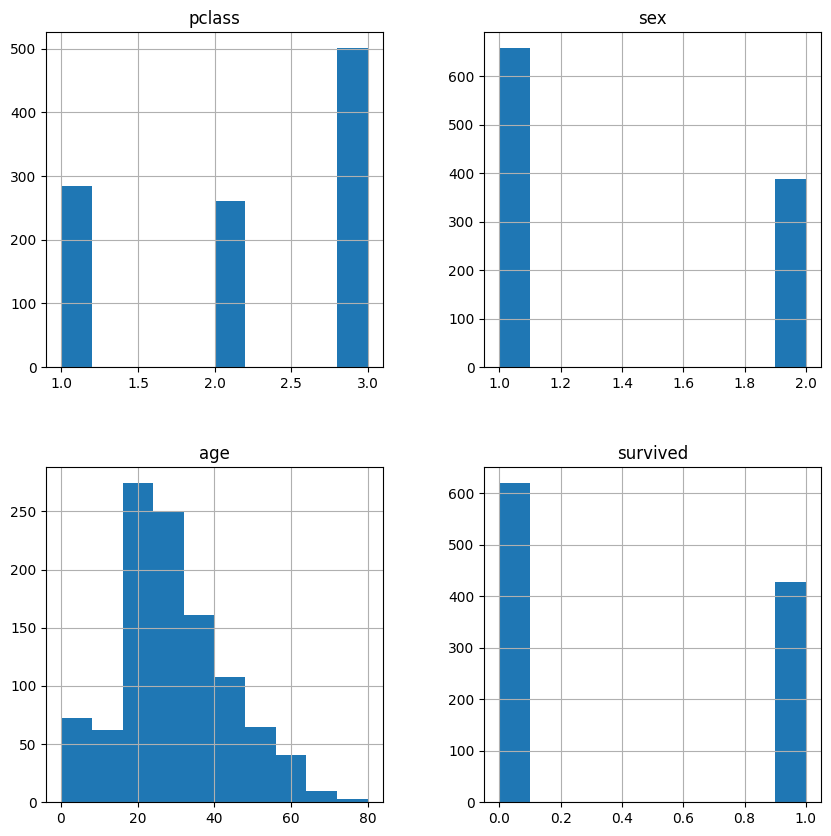

In [8]:
# plot histograms of the variables
df.hist(figsize=(10, 10))
plt.show()

In [9]:
# extract explanatory variables into a data frame
X = df.loc[:, 'pclass':'age']
# extract response variable (class variable) into a series
Y = df.loc[:, 'survived']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)


In [10]:
# Create a random forest classifier and train it
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, min_samples_leaf=30, random_state=123)
model.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.7, min_samples_leaf=30, random_state=123)

In [11]:
# Display the confusion matrix and the classification report
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(Y_test, Y_pred)}')
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

# Display the feature importances
print(model.feature_importances_)

Confusion matrix:
[[186   3]
 [ 62  63]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       189
           1       0.95      0.50      0.66       125

    accuracy                           0.79       314
   macro avg       0.85      0.74      0.76       314
weighted avg       0.83      0.79      0.77       314

[0.28484355 0.61249565 0.1026608 ]


The results indicate that the random forest model achieved an accuracy of 0.79 on the test set, which is significantly better than the baseline accuracy of 0.61 (the proportion of passengers who did not survive).

If the model predicts survival, it is correct 95% of the time, whereas predicted deaths are correct 75% of the time. The model has a recall of only 0.50 for survival and 0.98 for death, which means that the model can recognize deaths much better than survival.

The feature importances show that the most important feature is the passenger sex, followed by the passenger class and age. A further look at the data reveals that, indeed, female passengers were more likely to survive in the Titanic disaster, as were passengers in the first class. Age also played a role, with younger passengers having a higher chance of survival.

[0.28484355 0.61249565 0.1026608 ]


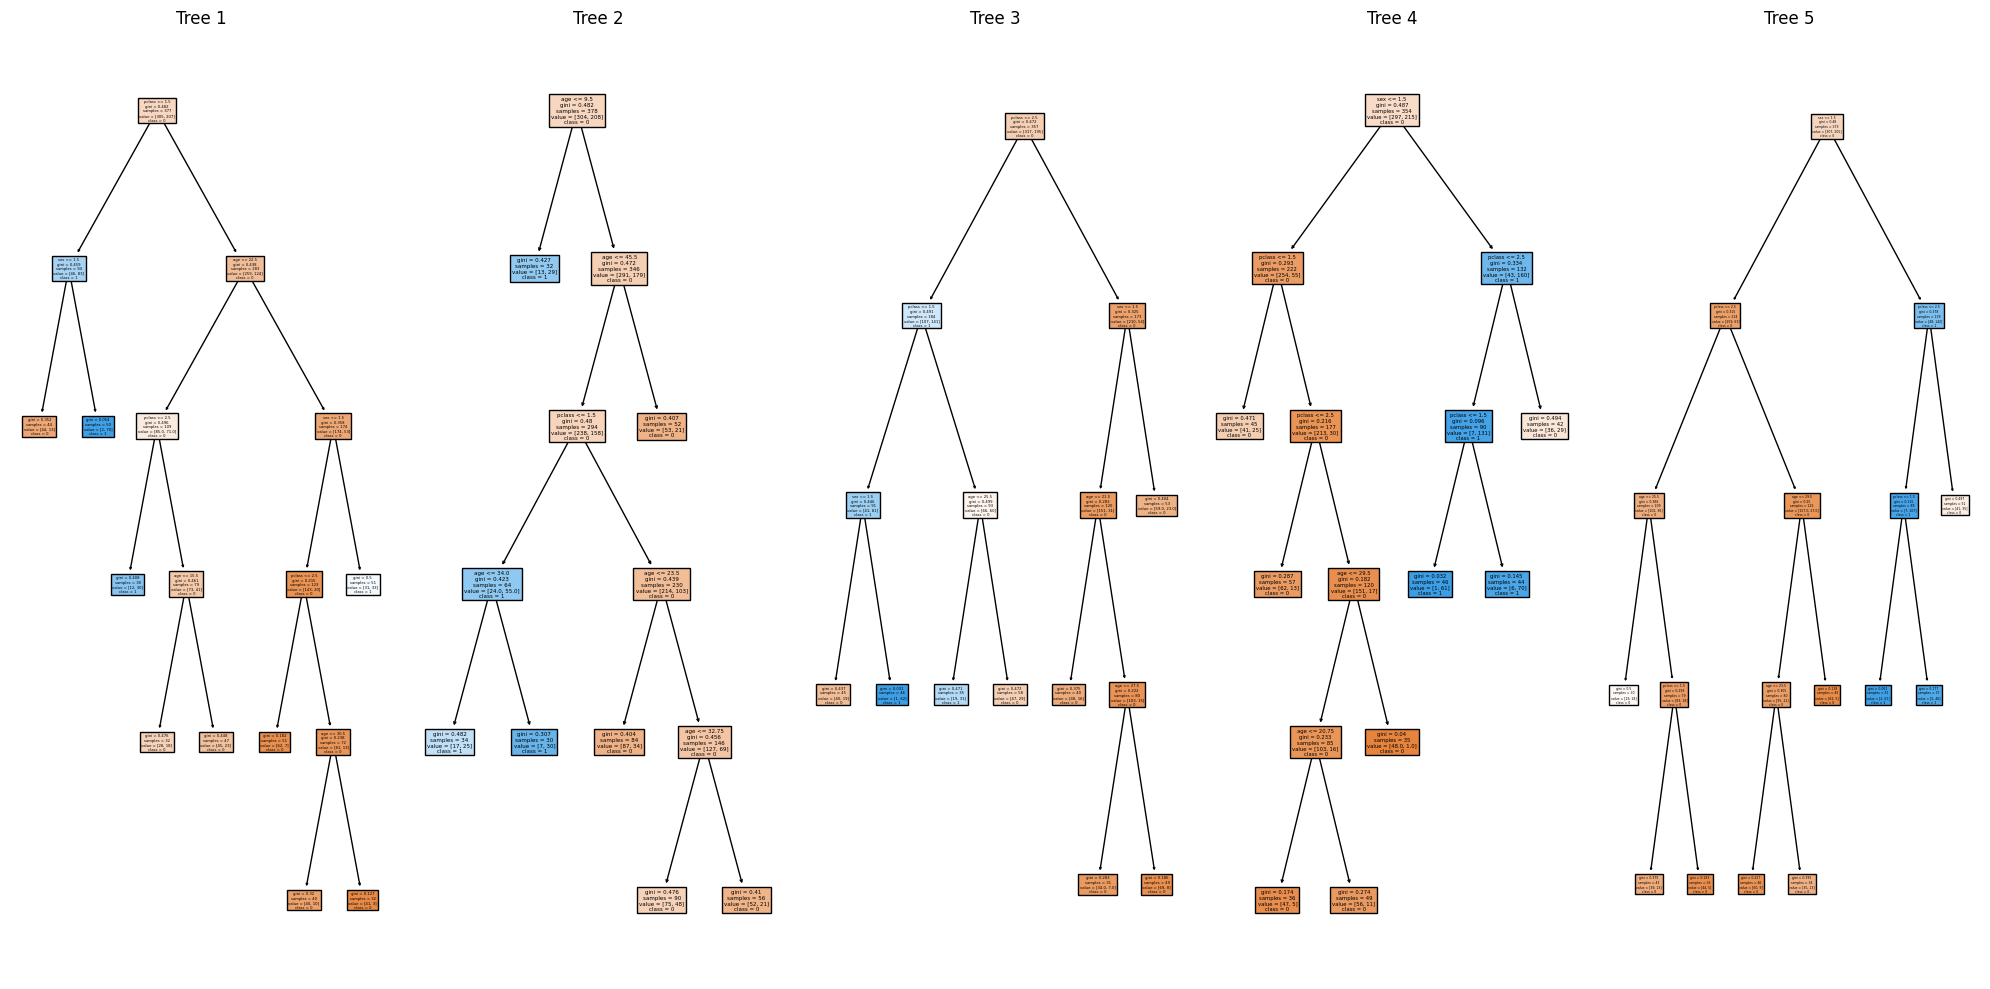

In [12]:
# Display the feature importances
print(model.feature_importances_)

# Peek a few trees
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_tree(model.estimators_[i], filled=True, feature_names=colnames[:-1], class_names=['0', '1'])
    plt.title(f'Tree {i + 1}')
plt.tight_layout()
plt.show()

# Output the first tree into a file
from sklearn.tree import export_text
tree_text = export_text(model.estimators_[0], feature_names=colnames[:-1].tolist())
with open('tree.txt', 'w') as f:
    f.write(tree_text)


## Random forests as classifiers

Random Forests are widely recognized as a powerful and versatile classification method due to their ensemble approach, which combines the predictions of multiple decision trees to enhance performance and robustness. One of the major strengths of random forests is their ability to handle a wide range of data types and complexities, including large datasets with a large number of features, missing values, and noisy data. The ensemble method helps mitigate overfitting by averaging the predictions of many trees, each built on a different subset of the data and features. This reduces variance and improves generalization.

However, despite their strengths, random forests also have limitations. One notable weakness is their lack of interpretability, or transparency, compared to simpler models. While individual decision trees are easy to understand and visualize, the complexity of an ensemble of trees makes it challenging to interpret the model’s decision-making process as a whole. Random forests can also be computationally intensive, especially when dealing with very large datasets or a high number of trees, leading to increased training time and memory usage. Additionally, while they are less prone to overfitting than single decision trees, they may still struggle with extremely high-dimensional data or situations where the number of trees needs careful tuning to avoid excessive computational cost.